# Toyota Corolla 중고차 가격 예측 모델 만들기

### 1. 분석 목적, 필요성

- 주어진 자료를 바탕으로 가격과 연관있는 변수를 찾아내어, 회귀식으로 정리한다.

In [67]:
import scipy.stats as scipystats

In [1]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
from statsmodels.graphics.regressionplots import *
from sklearn.cross_validation import train_test_split
import math
import statsmodels.stats as stats 
import numpy as np
import pandas as pd
import scipy.stats as scipystats
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2. 분석 프로세스

#### -1 데이터 읽기

In [5]:
# train set
toyota = pd.read_csv("train.csv")
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Year
0,112,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31000,4,5,2004,4000,Diesel,116,1,...,1,0,1,1,1,1,0,0,0,7
1,117,TOYOTA Corolla 2.0 D4D 90 WAGON SOL Stationwagen,24990,8,1,2004,6000,Diesel,90,1,...,1,0,0,1,1,1,0,0,0,7
2,114,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,0,0,0,0,0,0,0,0,7
3,115,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,0,0,0,0,0,0,0,0,7
4,149,TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-...,24500,13,8,2003,19988,Petrol,110,1,...,1,0,1,1,1,1,0,0,0,6


#### -3 변수 탐색 - EDA

In [65]:
# Step1. Price를 y로 설정. 독립변수 x 구분, 쓰지 않는 변수 id,model은 del로 분리
y = toyota.iloc[:,:3]
x = toyota.iloc[:,3:]
Del = toyota.iloc[:,:2]

y.head()
x.head()


,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Year
0,4,5,2004,4000,Diesel,116,1,Grey,0,2000,...,1,0,1,1,1,1,0,0,0,7
1,8,1,2004,6000,Diesel,90,1,Grey,0,2000,...,1,0,0,1,1,1,0,0,0,7
2,8,1,2004,13253,Diesel,116,1,Grey,0,2000,...,1,0,0,0,0,0,0,0,0,7
3,8,1,2004,13253,Diesel,116,1,Grey,0,2000,...,1,0,0,0,0,0,0,0,0,7
4,13,8,2003,19988,Petrol,110,1,Grey,0,1600,...,1,0,1,1,1,1,0,0,0,6


In [26]:
# Step2. 예측하고자 하는 변수 Price의 다름을 파악.
y["Price"].describe() 

count     1019.000000
mean     10738.358194
std       3614.987568
min       4350.000000
25%       8400.000000
50%       9850.000000
75%      11950.000000
max      31000.000000
Name: Price, dtype: float64

In [31]:
x.head() # 독립변수 36개

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Year
0,4,5,2004,4000,Diesel,116,1,Grey,0,2000,...,1,0,1,1,1,1,0,0,0,7
1,8,1,2004,6000,Diesel,90,1,Grey,0,2000,...,1,0,0,1,1,1,0,0,0,7
2,8,1,2004,13253,Diesel,116,1,Grey,0,2000,...,1,0,0,0,0,0,0,0,0,7
3,8,1,2004,13253,Diesel,116,1,Grey,0,2000,...,1,0,0,0,0,0,0,0,0,7
4,13,8,2003,19988,Petrol,110,1,Grey,0,1600,...,1,0,1,1,1,1,0,0,0,6


#### -4 독립 변수 구분

In [9]:
# 1. '양적 변수(이산형, 연속형)'와 '질적 변수'로 구분.

In [47]:
# 연속형 변수 
continous_variable = ['KM', 'Weight', 'Age_08_04']

In [48]:
# 이산형 변수
discrite_variable = ['CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Mfg_Month', 'Mfg_Year', 'Guarantee_Period', 'HP']

In [49]:
# 질적 변수 
qualitative_varriable = ['Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 
           'Automatic_airco', 'Boardcomputer','CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 
           'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [51]:
# 2. 연속형 
x_continous= x[continous_variable]
x_continous.head()

,KM,Weight,Age_08_04
0,4000,1480,4
1,6000,1280,8
2,13253,1320,8
3,13253,1320,8
4,19988,1130,13


In [53]:
# 이산형
x_discrite = x[discrite_variable] 
x_discrite.head()

,CC,Doors,Cylinders,Gears,Quarterly_Tax,Mfg_Month,Mfg_Year,Guarantee_Period,HP
0,2000,5,4,5,283,5,2004,3,116
1,2000,5,4,5,234,1,2004,3,90
2,2000,5,4,5,234,1,2004,3,116
3,2000,5,4,5,234,1,2004,3,116
4,1600,5,4,5,85,8,2003,3,110


In [54]:
# 질적변수
x_qualitative= dfx[qualitative_varriable]
x_qualitative.head()

,Fuel_Type,Met_Color,Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Airco,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,Diesel,1,Grey,0,0,1,1,1,1,1,...,1,1,0,1,1,1,1,0,0,0
1,Diesel,1,Grey,0,1,1,1,1,1,1,...,1,1,0,0,1,1,1,0,0,0
2,Diesel,1,Grey,0,0,0,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3,Diesel,1,Grey,0,0,0,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
4,Petrol,1,Grey,0,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,0,0


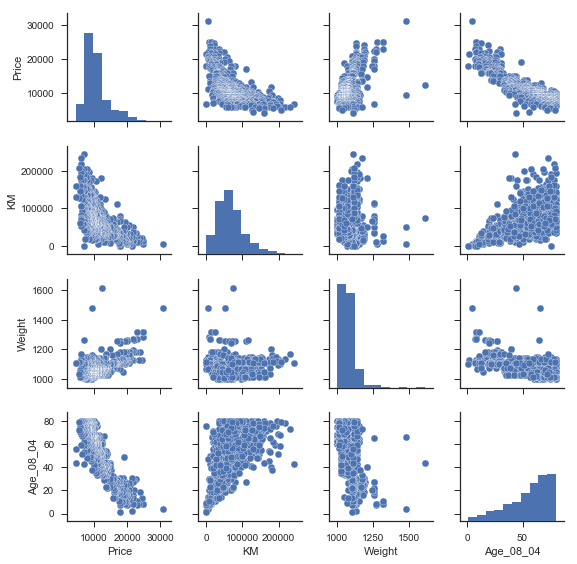

In [55]:
# -3 PairPlot
# price와 연속형 데이터 간의 산포도
with plt.style.context(('seaborn-ticks')):
    sns_plot = sns.pairplot(pd.concat([y.Price, x_continous], axis=1) ,size=2)

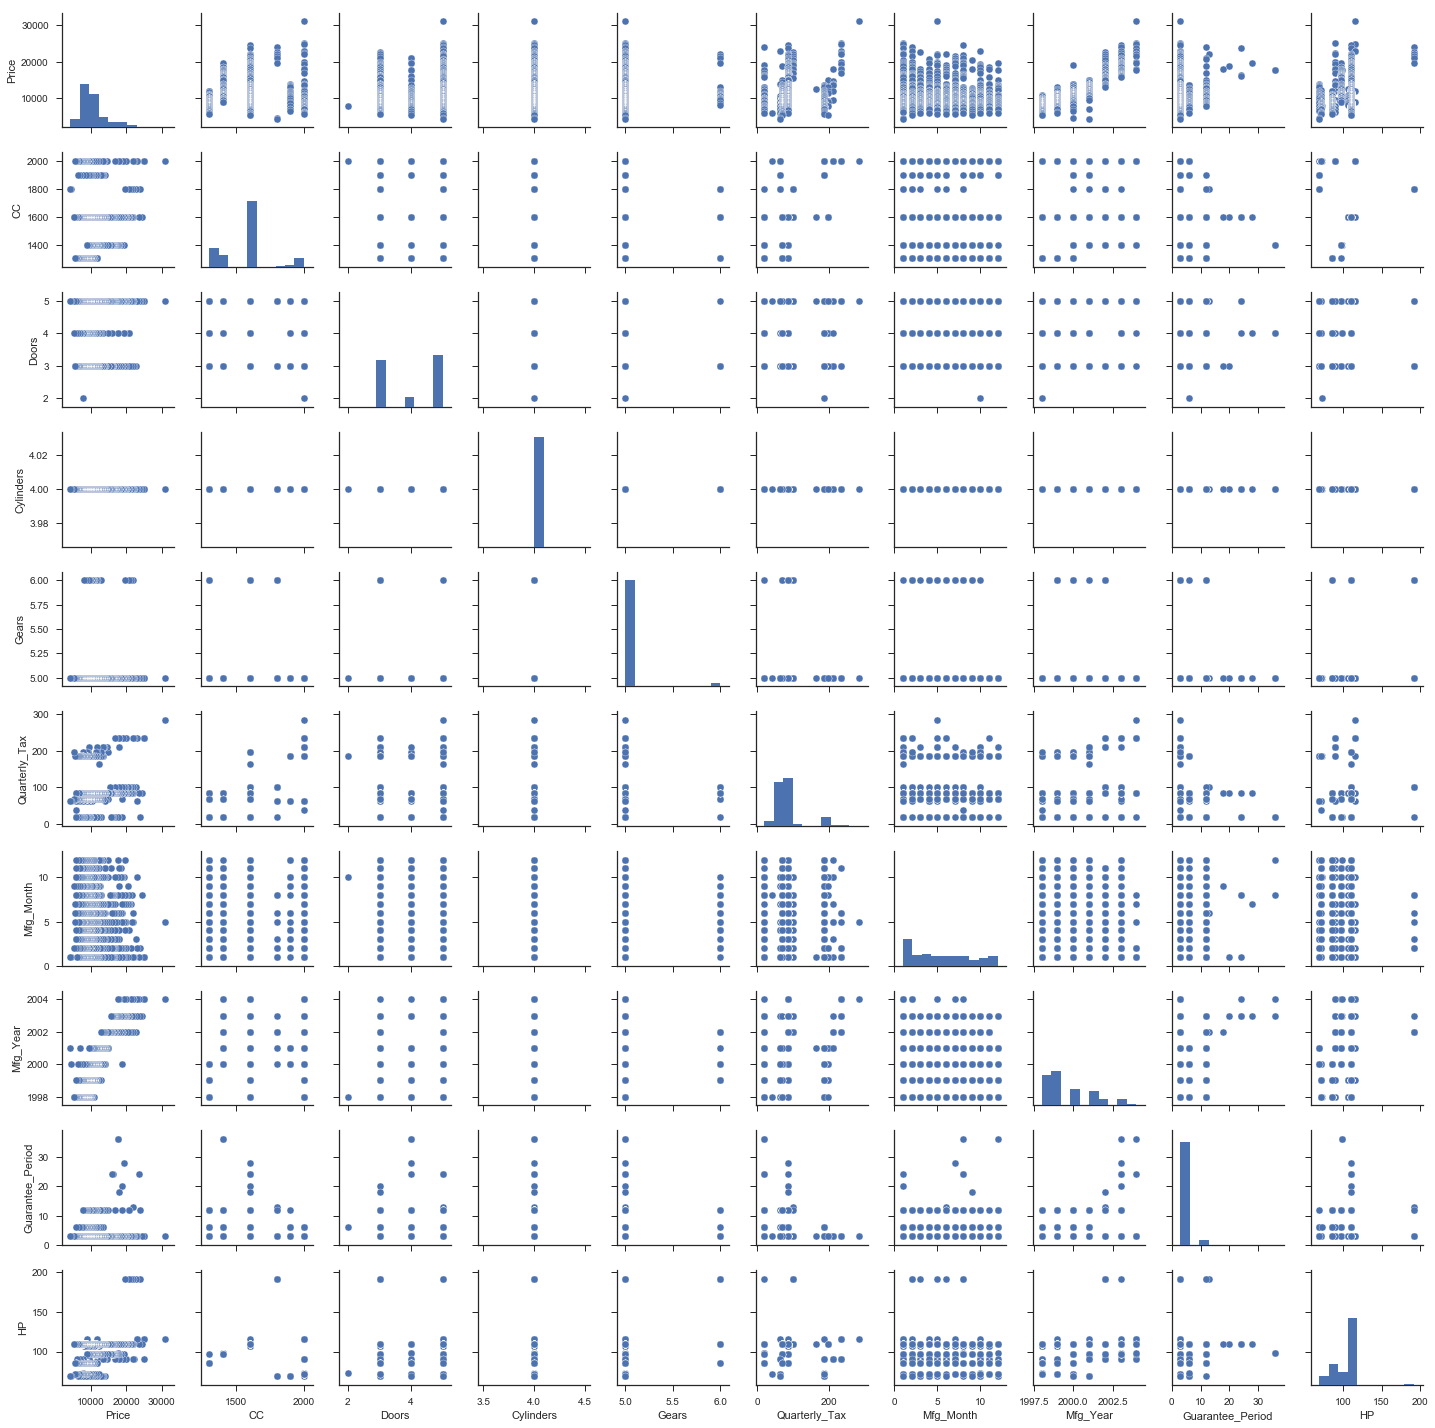

In [56]:
# price와 이산형 데이터 간의 산포도
with plt.style.context(('seaborn-ticks')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, x_discrite], axis=1) ,size=2)

#### 연속형 변수와 종속 변수 Price 간 상관분석
- 변수간 상관성 분석


In [58]:
# 1 상관계수
corr_matrix = pd.concat([y.Price, x_continous], axis=1) 
corr = corr_matrix.corr()
corr

,Price,KM,Weight,Age_08_04
Price,1.000000,-0.575962,0.557015,-0.883900
KM,-0.575962,1.000000,-0.011154,0.516486
Weight,0.557015,-0.011154,1.000000,-0.463990
Age_08_04,-0.883900,0.516486,-0.463990,1.000000


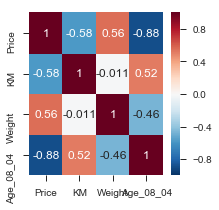

In [59]:
# heatmap
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(corr, annot=True)

In [80]:
# 2. Pearson 상관분석 - 조건 : 정규성 만족

print("km = ", end="")
print (scipystats.pearsonr(y.Price, x.KM))

print("Weight = ", end="")
print (scipystats.pearsonr(y.Price, x.Weight))

print("Age_08_04 = ", end="")
print (scipystats.pearsonr(y.Price, x.Age_08_04))

km = (-0.57596185216445728, 4.2103663413923655e-91)
Weight = (0.55701487105264835, 4.1793981498581291e-84)
Age_08_04 = (-0.88389997596143077, 0.0)


KM, Weight, Age_08_04 유의수준 0.05에서 pvalue가 유의수준 미만이므로, y와 통계적으로 상관관계가 있다. 

#### 이산형 변수, 질적 변수 - 독립 표본 T검정 or 분산분석 
- 독립 표본 T검정 - 값이 2개
- 분산분석 - 값이 3개 이상

##### -1. Unique Value 작업

In [82]:
# 이산형 변수, 질적 변수 합침
x_discrite_qualitative = pd.concat([x_discrite, x_qualitative], axis=1)

# 이산형 변수, 질적 변수, Y 합침
y_x_discrite_qualitative= pd.concat([y.Price, x_discrite_qualitative], axis=1)

In [84]:
for col in y_x_discrite_qualitative.columns:
    print("%-17s : %s" % (col, y_x_discrite_qualitative[col].unique()))

Price             : [31000 24990 24950 24500 23950 23750 23000 22950 22750 22250 22000 21950
 21750 21500 20950 20750 20500 19950 19750 19600 19500 19450 19250 18990
 18950 18900 18800 18750 18500 18450 17950 17900 17795 17650 17495 17450
 17200 16950 16895 16750 16650 16500 16450 16350 16250 15999 15950 15850
 15800 15750 15500 15250 14990 14950 14900 14750 14350 13995 13950 13875
 13750 13500 13450 13250 13000 12950 12900 12850 12750 12695 12500 12495
 12450 12400 12295 12250 12200 12000 11990 11950 11930 11900 11895 11790
 11750 11710 11700 11690 11650 11500 11495 11480 11450 11250 11000 10995
 10950 10900 10850 10750 10600 10500 10495 10450 10350 10250 10000  9995
  9990  9980  9950  9940  9900  9895  9850  9800  9799  9795  9750  9700
  9695  9650  9550  9500  9475  9450  9400  9390  9250  9245  9200  9130
  9000  8995  8950  8900  8850  8800  8750  8745  8700  8600  8500  8495
  8490  8450  8400  8250  8200  8150  8100  8050  8000  7995  7990  7950
  7900  7800  7795  7750  7600 

##### -2. 독립2표본 T검정

In [89]:
for col in y_x_discrite_qualitative.columns:
    a = y_x_discrite_qualitative[col].unique()
    if len(a) == 2:
        test = scipystats.ttest_ind(y_x_discrite_qualitative['Price'][y_x_discrite_qualitative[col]
                                                                        == a[0]], y_x_discrite_qualitative['Price'][y_x_discrite_qualitative[col] == a[1]])
        p_value = test[1]
        if pvalue < 0.05:
            print ("p-value < 0.05", col, p_value)
        else:
            print ("p-value >= 0.05", col, p_value)
    else:
        pass 

p-value >= 0.05 Gears 0.088088936483
p-value < 0.05 Met_Color 9.49296928354e-07
p-value < 0.05 Automatic 0.0298152048926
p-value < 0.05 Mfr_Guarantee 1.17198423723e-07
p-value >= 0.05 BOVAG_Guarantee 0.257340657291
p-value < 0.05 ABS 2.75300110801e-23
p-value < 0.05 Airbag_1 0.00225189746914
p-value < 0.05 Airbag_2 2.45959919815e-15
p-value < 0.05 Airco 1.52604364152e-50
p-value < 0.05 Automatic_airco 1.20610835392e-98
p-value < 0.05 Boardcomputer 1.33630235767e-102
p-value < 0.05 CD_Player 1.58629440576e-63
p-value < 0.05 Central_Lock 9.1982325518e-33
p-value < 0.05 Powered_Windows 4.26526523727e-33
p-value < 0.05 Power_Steering 0.0381794125363
p-value >= 0.05 Radio 0.448874747628
p-value < 0.05 Mistlamps 1.87871940527e-13
p-value < 0.05 Sport_Model 9.59794053145e-08
p-value < 0.05 Backseat_Divider 0.00961258090702
p-value < 0.05 Metallic_Rim 1.14223544575e-05
p-value >= 0.05 Radio_cassette 0.434161706357
p-value >= 0.05 Parking_Assistant 0.153071047351
p-value < 0.05 Tow_Bar 4.854567

#### 결과
#### P-value < 0.05 (대립) 
- Met_Color, Automatic, Mfr_Guarantee, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player
- Central_Lock, Powered_Windows, Power_Steering, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Tow_Bar

#### P-value >= 0.05 (귀무) 
- Gears, BOVAG_Guarantee, Radio, Radio_cassette, Parking_Assistant 

In [91]:
# 귀무를 따르는 변수 삭제
Delete = ['Cylinders', 'Gears', 'BOVAG_Guarantee','Radio', 'Radio_cassette', 'Parking_Assistant']
y_x_discrite_qualitative_del = y_x_discrite_qualitative.drop(Delete, axis=1)
y_x_discrite_qualitative_del.tail()

,Price,CC,Doors,Quarterly_Tax,Mfg_Month,Mfg_Year,Guarantee_Period,HP,Fuel_Type,Met_Color,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar
1014,5600,1300,3,69,6,1998,3,86,Petrol,0,...,0,0,0,0,1,0,1,1,0,0
1015,5250,1600,5,197,2,1998,3,110,CNG,1,...,0,0,0,0,1,0,0,1,0,0
1016,5250,1600,4,69,9,1998,3,110,Petrol,1,...,0,0,0,0,1,0,0,0,1,0
1017,4450,1800,5,64,1,2000,3,69,Diesel,0,...,0,0,1,0,1,0,0,0,0,0
1018,4350,1800,5,64,1,2001,3,69,Diesel,0,...,1,0,1,1,1,0,0,0,0,0


##### -3. 분산분석

In [92]:
for col in x_discrite_qualitative.columns:
    a = x_discrite_qualitative[col].unique()
    if len(a) > 2:
        print (col, a)
    else:
        pass 

CC [2000 1600 1800 1400 1900 1300]
Doors [5 3 4 2]
Quarterly_Tax [283 234  85  19  64 100  69 210 197 185 163  72  40]
Mfg_Month [ 5  1  8  2 10  3  6  7  4  9 12 11]
Mfg_Year [2004 2003 2002 2000 2001 1999 1998]
Guarantee_Period [ 3 12 24 13 28 20 18 36  6]
HP [116  90 110 192  97  98  69 107  72  86  73]
Fuel_Type ['Diesel' 'Petrol' 'CNG']
Color ['Grey' 'Silver' 'Blue' 'Black' 'Green' 'Red' 'Yellow' 'Violet' 'White'
 'Beige']


In [93]:
# Doors
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Doors"] == 3].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Doors"] == 4].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Doors"] == 5].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Doors"] == 2].Price)

F_onewayResult(statistic=13.157426161496677, pvalue=1.9673598160670142e-08)

In [94]:
# Fuel_Type
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Fuel_Type"] == "Diesel"].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Fuel_Type"] == "Petrol"].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Fuel_Type"] == "CNG"].Price)

F_onewayResult(statistic=0.25809499656665041, pvalue=0.77257247583343869)

In [97]:
# CC
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 2000].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1800].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1600].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1400].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1598].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 16000].Price, # 람보르기니?
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1995].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1900].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1300].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1398].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1332].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["CC"] == 1587].Price)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


F_onewayResult(statistic=nan, pvalue=nan)

In [98]:
# Quarterly_Tax 
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 210].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 100].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 85].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 19].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 234].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 69].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 283].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 64].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 185].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 197].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 163].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 72].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Quarterly_Tax"] == 40].Price)          

F_onewayResult(statistic=49.561362796544543, pvalue=6.8050512640195251e-93)

In [99]:
# Mfg_Month 
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 10].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 3].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 8].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 2].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 5].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 9].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 4].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 6].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 7].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 1].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 11].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Month"] == 12].Price)

F_onewayResult(statistic=1.5786619529848633, pvalue=0.099474951295375993)

In [100]:
# Mfg_Year 
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 2002].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 2003].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 2004].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 2001].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 2000].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 1999].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Mfg_Year"] == 1998].Price)

F_onewayResult(statistic=917.09097641461994, pvalue=0.0)

In [101]:
# Guarantee_Period 
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 3].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 12].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 18].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 13].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 20].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 24].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 28].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 36].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Guarantee_Period"] == 6].Price)

F_onewayResult(statistic=7.6269348951481284, pvalue=6.0605549363256298e-10)

In [104]:
# HP 
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 90].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 192].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 110].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 97].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 116].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 98].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 69].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 72].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 86].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 107].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["HP"] == 73].Price)

F_onewayResult(statistic=41.821554352070997, pvalue=2.2391209733572494e-69)

In [105]:
# Color 
scipystats.f_oneway(y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Blue'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Silver'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Black'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Red'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Grey'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Green'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'White'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Yellow'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Violet'].Price,
               y_x_discrite_qualitative_del.loc[y_x_discrite_qualitative_del["Color"] == 'Beige'].Price)

F_onewayResult(statistic=6.4992939839072204, pvalue=4.9278984813640487e-09)

#### 결과
#### P-value < 0.05 (대립) 
- Doors, CC, Quarterly_Tax, Mfg_Year, Guarantee_Period, HP, Color

#### P-value >= 0.05 (귀무) 
- Fuel_Type, Mfg_Month 

In [107]:
# 귀무를 따르는 변수 삭제
Delete2 = ['Fuel_Type', 'Mfg_Month']
y_x_discrite_qualitative_del2 = y_x_discrite_qualitative_del.drop(Delete2, axis = 1)
y_x_discrite_qualitative_del2.head()

,Price,CC,Doors,Quarterly_Tax,Mfg_Year,Guarantee_Period,HP,Met_Color,Color,Automatic,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar
0,31000,2000,5,283,2004,3,116,1,Grey,0,...,1,1,1,1,1,1,1,1,1,0
1,24990,2000,5,234,2004,3,90,1,Grey,0,...,1,0,1,1,1,0,1,1,1,0
2,24950,2000,5,234,2004,3,116,1,Grey,0,...,0,1,1,1,1,0,0,0,0,0
3,24950,2000,5,234,2004,3,116,1,Grey,0,...,0,1,1,1,1,0,0,0,0,0
4,24500,1600,5,85,2003,3,110,1,Grey,0,...,1,1,1,1,1,1,1,1,1,0


In [108]:
# 최종 종속 변수
Delete3 = ['Price']
y_x_discrite_qualitative_del3 = y_x_discrite_qualitative_del.drop(Delete3, axis = 1)

X_final = pd.concat([y_x_discrite_qualitative_del3,x_continous], axis=1)
X_final.shape

(1019, 30)

## 4. Feature Selection

In [144]:
# 상관계수 고려하여 셀렉
lm = LinearRegression()
Y = y.Price

# First_Model - 상관계수가 높았던 변수들로 1차 모델링 
First_attributes = ['Age_08_04', 'KM', 'Weight', 'Mfg_Year', 'Boardcomputer', 'Automatic_airco']
First_Model = lm.fit(X_final[First_attributes], Y)
# Socre
print (First_Model.coef_)
print (First_Model.score(X_final[First_attributes], Y))

[ -2.23254110e+01  -1.94952732e-02   1.34483121e+01   1.21753671e+03
  -2.13790899e+02   2.69986225e+03]
0.881244387337


In [136]:
# Second_Model -  'Boardcomputer' 제거
Second_attributes = ['Age_08_04', 'KM', 'Weight', 'Mfg_Year', 'Automatic_airco']
Second_Model = lm.fit(X_final[Second_attributes], Y)
# Score 
Second_Model.score(X_final[Second_attributes], Y)

0.88090222098788928

In [137]:
# Third_Model -  'Age_08_04' 제거
Thrid_attributes = [ 'KM', 'Weight', 'Mfg_Year', 'Automatic_airco']
Third_Model = lm.fit(X_final[Thrid_attributes], Y)
# Score 
Third_Model.score(X_final[Thrid_attributes], Y)

0.88055690937854358

###### First model 로 결정

In [143]:
# 각 feature 별 coef. 구해봄.
X_final_feature = X_final[First_attributes]
pd.DataFrame(list(zip(X_final_feature.columns, lm.coef_)), columns = ['features', 'estimatedCoefficient'] )

,features,estimatedCoefficient
0,Age_08_04,-22.325411
1,KM,-0.019495
2,Weight,13.448312
3,Mfg_Year,1217.536715
4,Boardcomputer,-213.790899
5,Automatic_airco,2699.862254


#### 다중회귀분석 실시 

In [145]:
model_multi = smf.ols("y.Price ~ x[First_attributes]", x).fit() 

In [146]:
model_multi.summary()
# x[First_attributes][4] 값이 0.088로 유의수준 0.05 를 크게 상회
# 해당 변수 삭제

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y.Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1252.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:08:46   Log-Likelihood:                -8708.3
No. Observations:                1019   AIC:                         1.743e+04
Df Residuals:                    1012   BIC:                         1.747e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.436e+06   2.91e+05     -8.371      0.000   -3.01e+06   -1.86e+06
x[First_attributes][0]   -22.3254     11.954     -1.868      0.062     -45.782       1.131
x[First_attributes][1]    -0.0195      0.001    -15.202      0.000      -0.022      -0.017
x[First_attributes][2]    13.4483      0.951     14.141      0.000      11.582      15.314
x[First_attributes][3]  1217.5367    145.252      8.382      0.000     932.506    1502.567
x[First_attributes][4]  -213.7909    125.201     -1.708      0.088    -459.474      31.892
x[First_attributes][5]  2699.8623    193.126     13.980      0.000    2320.890    3078.835
==============================================================================
Omnibus:                      112.771   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.092
Skew:                          -0.224   Prob(JB):                    1.20e-166
Kurtosis:                       7.218   Cond. No.                     5.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
# Model_Ver1 - x[First_attributes][4] 제거 

model_ver1 =  smf.ols("y.Price ~ Age_08_04 + KM + Weight + Mfg_Year + Automatic_airco",x).fit()
print (model_ver1.summary())

# Age_08_04  값이 0.087로 유의수준 0.05 를 크게 상회
# 해당 변수 삭제

                            OLS Regression Results                            
Dep. Variable:                y.Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1499.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:25:20   Log-Likelihood:                -8709.8
No. Observations:                1019   AIC:                         1.743e+04
Df Residuals:                    1013   BIC:                         1.746e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.384e+06    2.9e+05     

In [159]:
# Model_Ver2 - x[First_attributes][4] 제거 

model_ver2 =  smf.ols("y.Price ~ KM + Weight + Mfg_Year + Automatic_airco",x).fit()
print (model_ver2.summary())

                            OLS Regression Results                            
Dep. Variable:                y.Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1869.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:27:56   Log-Likelihood:                -8711.3
No. Observations:                1019   AIC:                         1.743e+04
Df Residuals:                    1014   BIC:                         1.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.865e+06   7.17e+04    -

### 최종모델 선택

회귀식
* yhat =--2.865e+06+ (-0.0197 KM ) + (13.6785 Weight) + (1431.2790	Mfg_Year ) + (2700.2437  Automatic_airco)

In [175]:
test = pd.read_csv("test.csv", encoding= "CP949")

In [177]:
attribute_Final = ["KM" , "Weight" , "Mfg_Year"  ,"Automatic_airco"]
testDF = test[attribute_Final]

In [181]:
selected_model = (testDF
                .assign(Yhat = lambda x:-2.865e+06 + (-0.0197*testDF.KM) + (13.6785 *testDF.Weight)
                        + (1431.2790 * testDF.Mfg_Year) + (2700.2437*testDF.Automatic_airco))) 

selected_model

,KM,Weight,Mfg_Year,Automatic_airco,Yhat
0,41711,1165,2002,0,15534.3038
1,48000,1165,2002,0,15410.4105
2,61000,1170,2002,0,15222.7030
3,94612,1245,2002,0,15586.4341
4,75889,1245,2002,0,15955.2772
5,19700,1185,2002,0,16241.4905
6,71138,1105,2002,0,14133.8819
7,43610,1185,2002,1,18470.7072
8,34131,1185,2002,1,18657.4435
9,25563,1065,2002,1,17184.8131


### 최종결과 csv파일로 만들기

In [182]:
selected_model.to_csv('selected_model.csv', sep=',', na_rep ='NaN')